In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import seaborn as sns
import altair as alt
import collections

In [2]:
wh = pd.read_csv("./watchHours.csv")
sg = pd.read_csv("./streamerGames.csv")
ga = pd.read_csv("./games.csv")

## What is Twitch and why is it important?
Twitch is a live streaming platform focused primarily on video games. On top of video games, Twitch offers other "IRL" (In Real Life) streaming categories such as "Just Chatting", "Travel & Outdoors, and "Music".

In the age of high media consumption, many people find themselves turning to other forms of content other than traditional TV. At first, we've seen the rise of streaming On-Demand content from websites such as Netflix and Disney+ over the past decade. Twitch, on the other hand, is focused on live content, which tends to be quite different for a few reasons. Live streaming content usually has a lower production value; however, viewers get to watch long, unedited, and in real time content, which provides unrivaled community interaction with the streamer and other viewers in the form of live chat. During the height of the pandemic in 2020, Twitch and other live-streaming platforms saw a boom in growth of the users and viewership.

In this notebook, I want to explore what, if anything, makes a Twitch streamer successful.

## Watch Time

### Definitions:
Note about data: All data in this notebook is of the last 365 days on Twitch as of 12/14/2022. Data was sourced from sullygnome.com

Note about variables: All time variables such as Watch time and Stream time are represented in minutes. <br>

**Watch time:** Watch time refers to the cumulative time people have watched the stream per viewer. This is calculated more or less by multiplying Stream time /* Average viewers. <br>
**Partnered:** Twitch has a Partner program where streamers who meet a set of minimum requirements can submit an application to become a Twitch Partner. Upon acceptance to the program, partners receive a set of additional platform perks. <br>
**Mature:** This variable refers to whether the stream has marked itself as 18+. This is usually done if a streamer uses a lot of foul language or if the streamer plays a lot of violent 17+ games. <br>

The main part of this notebook looks at data from the top 1000 streames in terms of Watch time. 

In [3]:
wh

,Rank,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers,Followers gained,Partnered,Mature,Language,Channel name
0,1,xQc,14011281315,203550,312158,68834,11428830,1800441,True,False,English,xQc
1,2,Gaules,9839529720,522840,669678,18819,3790658,600843,True,True,Portuguese,Gaules
2,3,ibai,6787631295,83070,3351678,81709,12085920,3489818,True,False,Spanish,ibai
3,4,auronplay,6118856040,67815,457641,90228,14208902,3287383,True,False,Spanish,auronplay
4,5,ESL_CSGO,5318476725,347145,550154,15320,5836661,763340,True,False,English,ESL_CSGO
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,JOEYKAOTYK,180036600,107565,11027,1673,143534,41308,True,False,English,JOEYKAOTYK
996,997,by_Owl,179990025,49320,27558,3649,446325,105478,True,False,Russian,by_Owl
997,998,drb7h,179835885,24525,22337,7332,531446,169191,True,False,Arabic,drb7h
998,999,KayzahR,179579340,105315,9816,1705,207171,37931,True,True,German,KayzahR


array([[<AxesSubplot:title={'center':'Watch time'}>,
        <AxesSubplot:title={'center':'Stream time'}>],
       [<AxesSubplot:title={'center':'Peak viewers'}>,
        <AxesSubplot:title={'center':'Average viewers'}>],
       [<AxesSubplot:title={'center':'Followers'}>,
        <AxesSubplot:title={'center':'Followers gained'}>]], dtype=object)

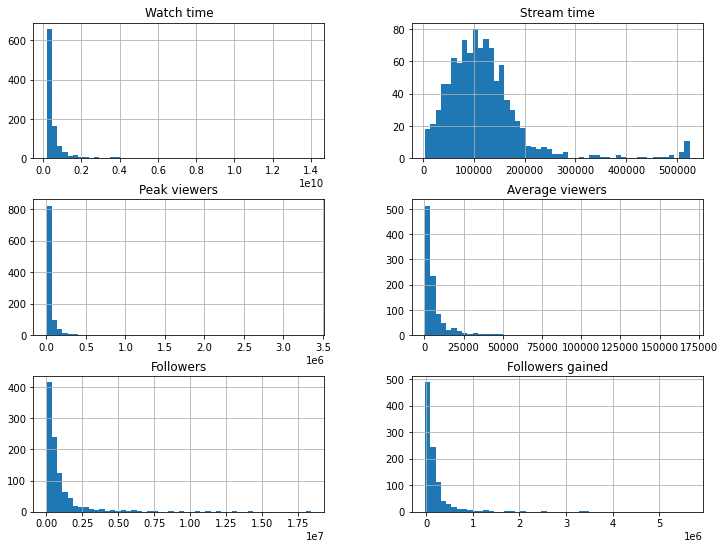

In [4]:
wh.hist(column=["Watch time", "Stream time", "Peak viewers", "Average viewers", "Followers", "Followers gained"], figsize=(12,9), bins= 50)

Initially, we see a large disparity in just about every category above besides stream time. In order to combat this, it could be worth looking at the log scale version of these histograms.

Text(0, 0.5, 'Probability Density')

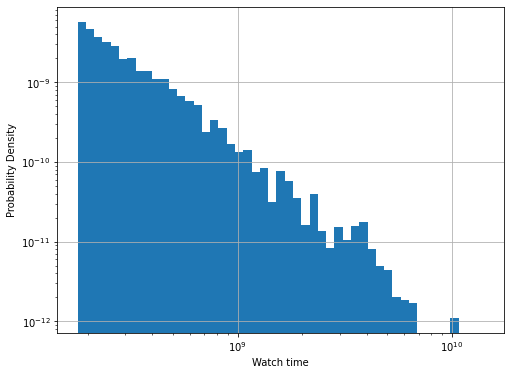

In [5]:
bins = np.logspace(np.log10(min(wh["Watch time"])), np.log10(max(wh["Watch time"])), num=50)
plt.figure(figsize=(8,6))
ax = wh["Watch time"].hist(bins=bins, density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Watch time")
ax.set_ylabel("Probability Density")

Text(0, 0.5, 'Probability Density')

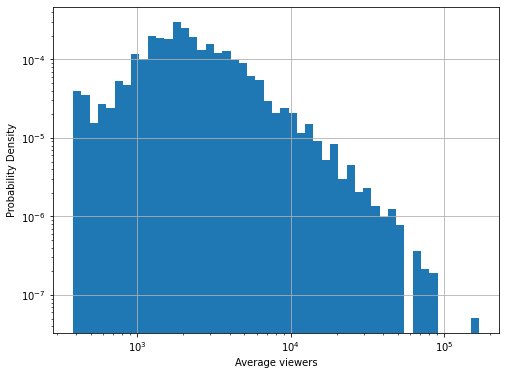

In [6]:
bins = np.logspace(np.log10(min(wh["Average viewers"])), np.log10(max(wh["Average viewers"])), num=50)
plt.figure(figsize=(8,6))
ax = wh["Average viewers"].hist(bins=bins, density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Average viewers")
ax.set_ylabel("Probability Density")

Text(0, 0.5, 'Probability Density')

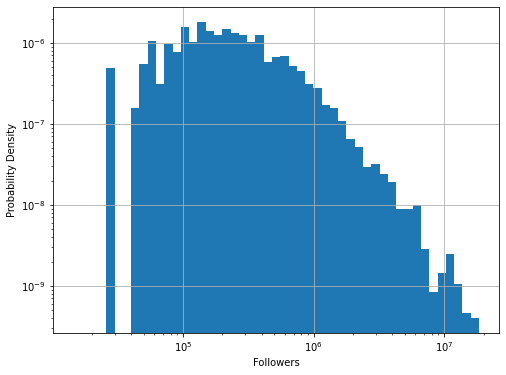

In [7]:
bins = np.logspace(np.log10(min(wh["Followers"])), np.log10(max(wh["Followers"])), num=50)
plt.figure(figsize=(8,6))
ax = wh["Followers"].hist(bins=bins, density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Followers")
ax.set_ylabel("Probability Density")

These histograms are a lot easier to see what is going on. As we can see from these log histograms, we can see that there is a large exponential growth from the bottom to the top in almost all of these categories.

Below, we can see a 1D scatterplot representing stream time in minutes. This is the only variable that isn't too exponential, and that largely has to due with the fact that there is a finate number of minutes in a year, and the fact that most streamers don't want to stream a ton of time each day.

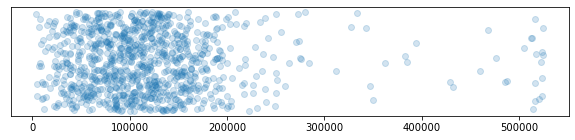

In [8]:
plt.figure(figsize=(10, 2))
y = np.random.rand(len(wh["Stream time"]))
plt.yticks(np.arange(0, 0))
plt.scatter(x = wh["Stream time"], y=y, alpha=0.2)

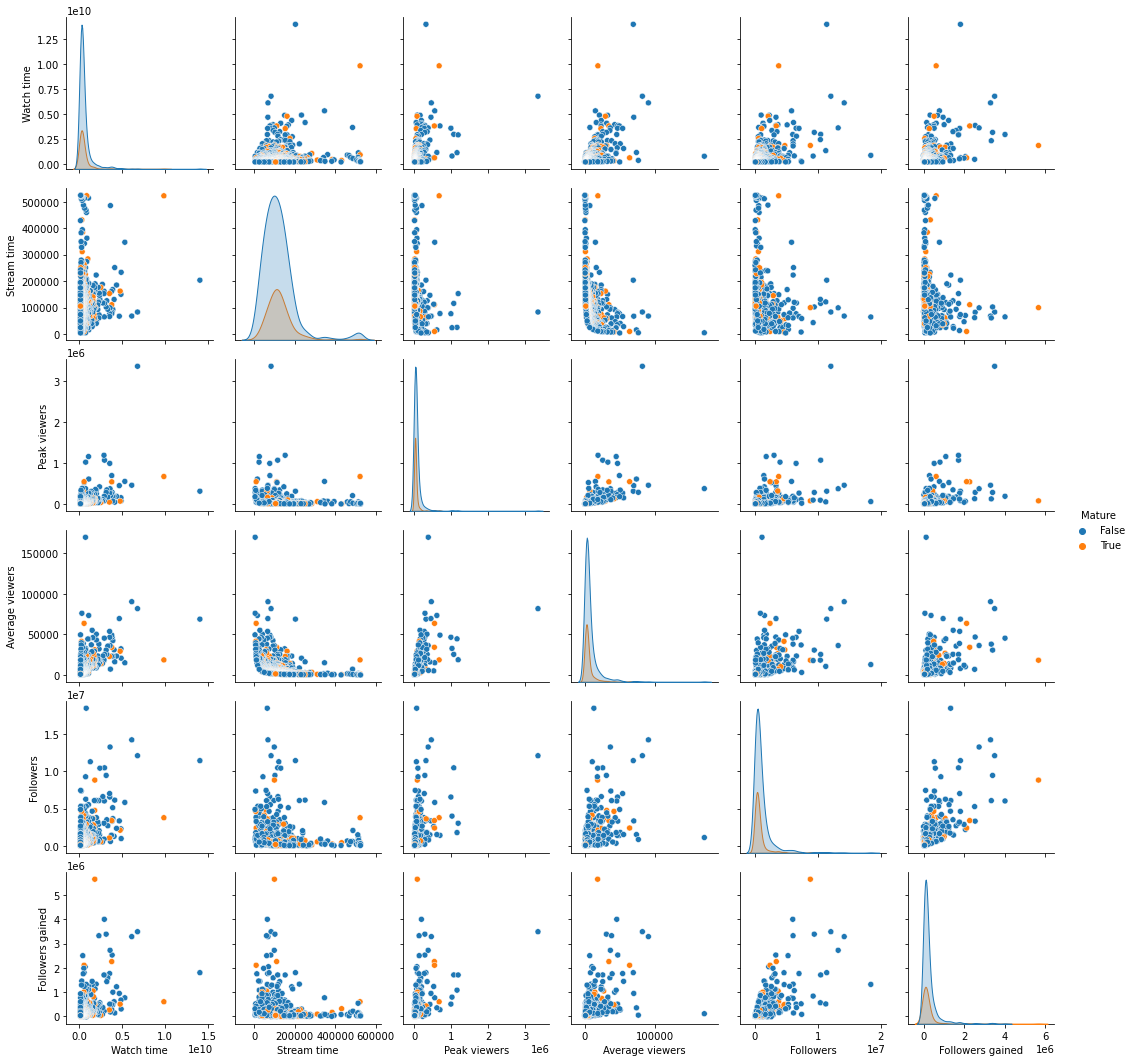

In [9]:
sns.pairplot(wh, x_vars = ["Watch time", "Stream time", "Peak viewers", "Average viewers", "Followers", "Followers gained"], 
             y_vars = ["Watch time", "Stream time", "Peak viewers", "Average viewers", "Followers", "Followers gained"], hue='Mature')

Above, we don't initially see anything that seems to be heavily coorelated with watch time besides stream time and average viewers, however that is to be expected as each of those makes up one of the components of watch time. 

In [10]:
lang_cnt = collections.Counter(wh.Language)
lang_cnt = lang_cnt.most_common()
for lang in lang_cnt:
    print(lang)

('English', 453)
('Spanish', 99)
('Korean', 71)
('German', 64)
('Russian', 63)
('French', 56)
('Portuguese', 51)
('Chinese', 37)
('Japanese', 30)
('Polish', 22)
('Italian', 21)
('Turkish', 14)
('Thai', 9)
('Arabic', 3)
('Czech', 2)
('Ukrainian', 1)
('Slovak', 1)
('Dutch', 1)
('Hungarian', 1)
('Finnish', 1)


Below is an interactive scatterplot. Stream time is on the x axis and Average viewers is on the y axis. The area of the square that would be made from the two axes and the point would represent the Watch time. The size of the mark also represents the Watch time to make things a little easier to see. The coloring represents partner status and the shape represents the indicated maturity of the stream. There is also a dropdown menu for viewers of this visualization to select their preffered language if they want to see top streamers in their language

In [11]:
from altair.expr import datum, substring

base = alt.Chart(wh).mark_point(opacity=0.5).encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(domain=(0, 550000))),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(domain=(0, 180000))),
    color=alt.Color('Partnered:N', sort= "descending"),
    shape = alt.Shape('Mature:N', sort= "descending"),
    tooltip=['Channel', alt.Tooltip("Watch time:Q", format=",.0f"), 
             alt.Tooltip("Stream time:Q", format=",.0f"), 
             alt.Tooltip("Average viewers:Q", format=",.0f")],
    size="Watch time:Q"
).properties(
    width=600,
    height=600
).repeat(
    row=['Average viewers'],
    column=['Stream time']
).configure_range(
    category=alt.RangeScheme(['#9146ff', 'black'])
).interactive()

langDropdown = alt.binding_select(options=[None] + sorted(list(wh.Language.unique())), labels = ['All'] + sorted(list(wh.Language.unique())), name="Language ")
selection = alt.selection_single(fields=['Language'], bind = langDropdown)

final = base.add_selection(
    selection
).transform_filter(
    selection
).properties(title="What Impacts Watch Time?")


final

alt.RepeatChart(...)

## Top 50 Streamers and Their Games

Below is a data set of the top 50 streamers and the games that they play. For the sake of simplicity and not overcrowding the visualizations, the dataset only includes the top 50 stream categories for each streamer. After the 50 mark is where most of the games are streamed for only a few hours or less, so excluding them from the visualizations has little impact on the effectiveness.

In [12]:
sg.sort_values(by=['Stream time'])

,Rank,Game,Stream time,Watch time,Average viewers,Peak viewers,Channel name,Channel
257,42,RoboCo,15,444855,29657,29657,ElSpreen,ElSpreen
264,49,Granny,15,384015,25601,25601,ElSpreen,ElSpreen
263,48,60 Seconds!,15,823425,54895,54895,ElSpreen,ElSpreen
262,47,Agar.io,15,499815,33321,33321,ElSpreen,ElSpreen
261,46,Universe Sandbox,15,337245,22483,22483,ElSpreen,ElSpreen
...,...,...,...,...,...,...,...,...
957,1,League of Legends,168165,2113497720,12568,33696,NoWay4u_Sir,NoWay4u_Sir
1237,1,VALORANT,169035,4136117415,24469,179978,tarik,tarik
411,1,Counter-Strike: Global Offensive,278025,7093251825,25513,624916,Gaules,Gaules
309,1,Counter-Strike: Global Offensive,347760,970249964,17187,491092,ESL_CSGO,ESL_CSGO


Below is a sorted list of the number of games each streamer plays. Most channels have a lot of variety with 30 or more games. At the bottom, there are a few channels that don't have much variety; however, many of those channels are game specific channels, such as Valorant, Rocket League, and League of Legends channels.

In [13]:
game_cnt = collections.Counter(sg.Channel)
gamedf = pd.DataFrame.from_dict(game_cnt, orient='index').reset_index()
gamedf = gamedf.rename(columns={'index':'Channel', 0:'Number of games'})
gamedf.sort_values(by=['Number of games'], ascending=False)

,Channel,Number of games
25,loud_coringa,50
17,IlloJuan,50
48,hanryang1125,50
47,woowakgood,50
45,xQc,50
40,TheGrefg,50
38,summit1g,50
37,stylishnoob4,50
36,sodapoppin,50
35,shroud,50


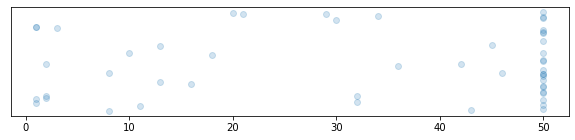

In [14]:
plt.figure(figsize=(10, 2))
y = np.random.rand(len(gamedf["Number of games"]))
plt.yticks(np.arange(0, 0))
plt.scatter(x = gamedf["Number of games"], y=y, alpha=0.2)

Below is another log histogram of the stream time per game of the top 50 streamers. As we can see in the histogram, the top streamers tend to play many games for a relatively short period. Some streamers do have a top game or category that they spend much of their time in as well. 

Text(0, 0.5, 'Probability Density')

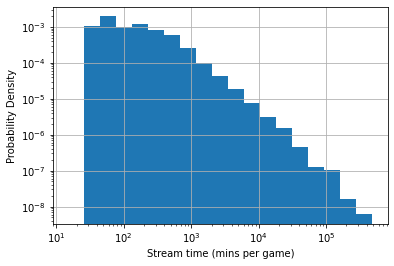

In [15]:
bins = np.logspace(np.log10(min(sg["Stream time"])), np.log10(max(sg["Stream time"])), num=20) 
ax = sg["Stream time"].hist(bins=bins, density=True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Stream time (mins per game)")
ax.set_ylabel("Probability Density")

Below, I add another column called "Game rank", and initially set all values to 101. Game rank refers to the rank of the game on Twitch as a whole in terms of watch time. For instance, the category "Just Chatting" has the most watch time of any category on Twitch, which is why it is ranked 1. I only took the top 100 watched categories from Twitch, which is why I set anything under that at 101.

In [16]:
sg['Game rank'] = 101

gameDict = pd.Series(ga.Rank.values, index = ga.Game).to_dict()

for i in range(sg.shape[0]):
    try:
        sg.at[i, "Game rank"] = gameDict[sg["Game"][i]]
    except:
        pass
sg

,Rank,Game,Stream time,Watch time,Average viewers,Peak viewers,Channel name,Channel,Game rank
0,1,Just Chatting,38475,2273603175,59093,257985,AdinRoss,AdinRoss,1
1,2,Slots,22140,941689215,43477,105164,AdinRoss,AdinRoss,11
2,3,Grand Theft Auto V,2085,117531690,56282,87798,AdinRoss,AdinRoss,3
3,4,NBA 2K23,1320,72148560,55391,75384,AdinRoss,AdinRoss,93
4,5,Fortnite,600,28812765,48739,62885,AdinRoss,AdinRoss,7
...,...,...,...,...,...,...,...,...,...
1615,46,The Dark Pictures Anthology: The Devil in Me,435,7614210,17503,20122,한동숙 (handongsuk),handongsuk,101
1616,47,Unpacking,405,3904815,9641,13705,한동숙 (handongsuk),handongsuk,101
1617,48,Food & Drink,405,5176485,12781,17152,한동숙 (handongsuk),handongsuk,89
1618,49,Planet Crafter,390,5170800,13258,20672,한동숙 (handongsuk),handongsuk,101


Below is an interactive scatterplot of the top 50 streamers and their games. The x-axis is the stream time of each game for each streamer, and the y axis is the average viewership while they played that game. The color scale is in reference to the game rank as explained above. Lastly, the watch time is once again represented as the size of the mark. Viewers of this visualization can also select their favorite streamer from the dropdown menu to see their specific games.

In [17]:
base = alt.Chart(sg).mark_point(opacity=0.5, invalid=None).encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    tooltip=['Game', 'Channel', 'Game rank', alt.Tooltip("Watch time:Q", format=",.0f"), 
             alt.Tooltip("Stream time:Q", format=",.0f"), 
             alt.Tooltip("Average viewers:Q", format=",.0f")],
    size="Watch time:Q",
    #color="Game rank:Q"
    color=alt.Color('Game rank:Q', scale=alt.Scale(domain=[101, 1], scheme='viridis'))
).properties(
    width=600,
    height=600
).repeat(
    row=['Average viewers'],
    column=['Stream time']
).interactive()

chanDropdown = alt.binding_select(options=[None] + sorted(list(sg.Channel.unique())), labels = ['All'] + sorted(list(sg.Channel.unique())), name="Channel ")
selection = alt.selection_single(fields=['Channel'], bind = chanDropdown)

final = base.add_selection(
    selection
).transform_filter(
    selection
).properties(title="What Impacts Watch Time?")


final

alt.RepeatChart(...)